<a href="https://colab.research.google.com/github/ferngonzalezp/deep_learning_lab/blob/main/2022/TP3/TP3_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# TP3 - Linear Models with Scikit-Learn



In this lesson we are going to return to the concept of linear regression and other types of linear models that we could use for regression and classification. We introduce classification problems for the first time here, but essentially what changes is that our model in this case will be a function that maps between input features to labels/classes/targets. Also a new API is introduced, scikit-learn which is built on numpy and is very useful for classic Machine Learning. At the end we will also see a two new concepts in ML: The firs is regularization, a trick that can help to mitigate underfitting/overfitting; the second one, is a method to try to fit data with Non-linear relations using linear models.

## Part 1: Introduction to Scikit-Learn

### First model with scikit-learn

In this notebook, we present how to build predictive models on tabular
datasets, with only numerical features.

In particular we will highlight:

* the scikit-learn API: `.fit(X, y)`/`.predict(X)`/`.score(X, y)`;
* how to evaluate the generalization performance of a model with a train-test
  split.



### Loading the dataset with Pandas

We will use the same dataset "adult_census". For more details about the dataset see
<http://www.openml.org/d/1590>.

Numerical data is the most natural type of data used in machine learning and
can (almost) directly be fed into predictive models. We will load a
subset of the original data with only the numerical columns.

In [ ]:
import pandas as pd

adult_census = pd.read_csv("./adult-census-numeric.csv")

Let's have a look at the first records of this dataframe:

In [ ]:
adult_census.head()

We see that this CSV file contains all information: the target that we would
like to predict (i.e. `"class"`) and the data that we want to use to train
our predictive model (i.e. the remaining columns). The first step is to
separate columns to get on one side the target and on the other side the
data.

### Separate the data and the target



In [ ]:
target_name = "class"
target = adult_census[target_name]
target

In [ ]:
data = adult_census.drop(columns=[target_name, ])
data.head()

We can now linger on the variables, also denominated features, that we will
use to build our predictive model. In addition, we can also check how many
samples are available in our dataset.

In [ ]:
data.columns

In [ ]:
print(f"The dataset contains {data.shape[0]} samples and "
      f"{data.shape[1]} features")

### Fit a model and make predictions


We will build a classification model using the "K-nearest neighbors"
strategy. To predict the target of a new sample, a k-nearest neighbors takes
into account its `k` closest samples in the training set and predicts the
majority target of these samples.

<div class="admonition caution alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Caution!</p>
<p class="last">We use a K-nearest neighbors here. However, be aware that it is seldom useful
in practice. We use it because it is an intuitive algorithm.</p>
</div>

The `fit` method is called to train the model from the input (features) and
target data.

In [ ]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data, target)

Learning can be represented as follows:

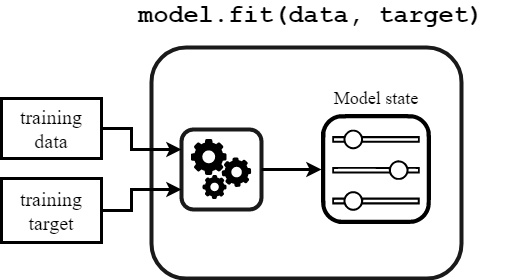

The method `fit` is composed of two elements: (i) a **learning algorithm**
and (ii) some **model states**. The learning algorithm takes the training
data and training target as input and sets the model states. These model
states will be used later to either predict (for classifiers and regressors)
or transform data (for transformers).

Both the learning algorithm and the type of model states are specific to each
type of model.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Here and later, we use the name <tt class="docutils literal">data</tt> and <tt class="docutils literal">target</tt> to be explicit. In
scikit-learn documentation, <tt class="docutils literal">data</tt> is commonly named <tt class="docutils literal">X</tt> and <tt class="docutils literal">target</tt> is
commonly called <tt class="docutils literal">y</tt>.</p>
</div>

Let's use our model to make some predictions using the same dataset.

In [ ]:
target_predicted = model.predict(data)

We can illustrate the prediction mechanism as follows:

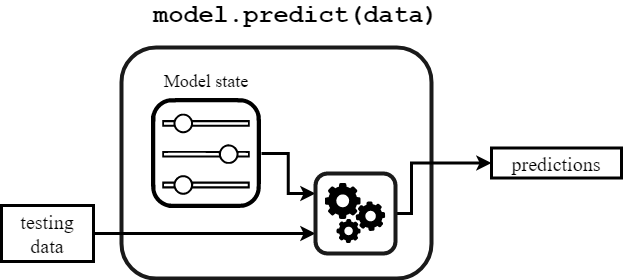

To predict, a model uses a **prediction function** that will use the input
data together with the model states. As for the learning algorithm and the
model states, the prediction function is specific for each type of model.

Let's now have a look at the computed predictions. For the sake of
simplicity, we will look at the five first predicted targets.

In [ ]:
target_predicted[:5]

Indeed, we can compare these predictions to the actual data...

In [ ]:
target[:5]

...and we could even check if the predictions agree with the real targets:

In [ ]:
target[:5] == target_predicted[:5]

In [ ]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Here, we see that our model makes a mistake when predicting for the first
sample.

To get a better assessment, we can compute the average success rate.

In [ ]:
(target == target_predicted).mean()

But, can this evaluation be trusted, or is it too good to be true?


### Train-test data split

When building a machine learning model, it is important to evaluate the
trained model on data that was not used to fit it, as **generalization** is
more than memorization (meaning we want a rule that generalizes to new data,
without comparing to data we memorized).
It is harder to conclude on never-seen instances than on already seen ones.

Correct evaluation is easily done by leaving out a subset of the data when
training the model and using it afterwards for model evaluation.
The data used to fit a model is called training data while the data used to
assess a model is called testing data.

We can load more data, which was actually left-out from the original data
set.

In [ ]:
adult_census_test = pd.read_csv('./adult-census-numeric-test.csv')

From this new data, we separate our input features and the target to predict,
as in the beginning of this notebook.

In [ ]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name, ])

We can check the number of features and samples available in this new set.

In [ ]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")


Instead of computing the prediction and manually computing the average
success rate, we can use the method `score`. When dealing with classifiers
this method returns their performance metric.

In [ ]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

Let's check the underlying mechanism when the `score` method is called:

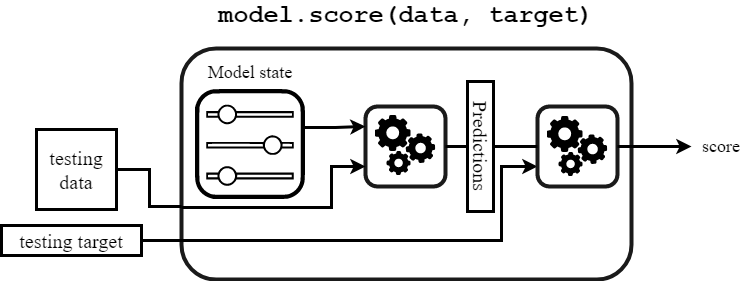

To compute the score, the predictor first computes the predictions (using
the `predict` method) and then uses a scoring function to compare the
true target `y` and the predictions. Finally, the score is returned.

If we compare with the accuracy obtained by wrongly evaluating the model
on the training set, we find that this evaluation was indeed optimistic
compared to the score obtained on a held-out test set.

It shows the importance to always testing the generalization performance of
predictive models on a different set than the one used to train these models.
We will discuss later in more details how predictive models should be
evaluated.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In this course, we will refer to <strong>generalization performance</strong> of a model when
referring to the test score or test error obtained by comparing the
prediction of a model and the true targets. Equivalent terms for
<strong>generalization performance</strong> are predictive performance and statistical
performance. We will refer to <strong>computational performance</strong> of a predictive
model when accessing the computational costs of training a predictive model
or using it to make predictions.</p>
</div>

### Exercise 1: Fitting a Scikit-Learn Model

The goal of this exercise is to fit a similar model as in the previous
notebook to get familiar with manipulating scikit-learn objects and in
particular the `.fit/.predict/.score` API.

Let's load the adult census dataset with only numerical variables

In [ ]:
import pandas as pd
adult_census = pd.read_csv("./adult-census-numeric.csv")
data = adult_census.drop(columns="class")
target = adult_census["class"]

In the previous notebook we used `model = KNeighborsClassifier()`. All
scikit-learn models can be created without arguments, which means that you
don't need to understand the details of the model to use it in scikit-learn.

One of the `KNeighborsClassifier` parameters is `n_neighbors`. It controls
the number of neighbors we are going to use to make a prediction for a new
data point.

What is the default value of the `n_neighbors` parameter? Hint: Look at the
documentation on the [scikit-learn
website](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
or directly access the description inside your notebook by running the
following cell. This will open a pager pointing to the documentation.

Create a `KNeighborsClassifier` model with `n_neighbors=50`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert model.n_neighbors == 50

Fit this model on the data and target loaded above

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Use your model to make predictions on the first 10 data points inside the
data. Do they match the actual target values?

In [ ]:
target_predicted = model.predict(data)
target_predicted[:10] == target[:10]
assert sum(target_predicted[:10] == target[:10]) >= 9

Compute the accuracy on the training data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
model_name = model.__class__.__name__

In [ ]:
print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

Now load the test data from `"./datasets/adult-census-numeric-test.csv"` and
compute the accuracy on the test data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
model_name = model.__class__.__name__

In [ ]:
print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

## Part 2: Linear Models


See the following video that gives a comprehensive overview on linear models. This video is part of the MOOC [Machine learning in Python with Scikit-Learn](https://www.fun-mooc.fr/en/courses/machine-learning-python-scikit-learn/). If you want to go deeper on classic ML and Scikit-Learn it is a good idea to check out this course.

In [ ]:
#@title Video: Intutition on Linear Models
from IPython.display import YouTubeVideo

YouTubeVideo('ksEGivkPP7I', width=800, height=500)

### 2.1 Linear Regression with Scikit-learn

In a previous lesson, we presented the parametrization of a linear model.
During the exercise, you saw that varying parameters will give different models
that will fit better or worse the data. To evaluate quantitatively this
goodness of fit, it is implemented a so-called metric.

When doing machine learning, you are interested in selecting the model which
will minimize the error on the data available the most.

Hopefully, this problem of finding the best parameters values (i.e. that
result in the lowest error) can be solved without the need to check every
potential parameter combination. Indeed, this problem has a closed-form
solution: the best parameter values can be found by solving an equation. This
avoids the need for brute-force search. This strategy is implemented in
scikit-learn.

In [ ]:
import pandas as pd

penguins = pd.read_csv("./penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

The instance `linear_regression` will store the parameter values in the
attributes `coef_` and `intercept_`. We can check what the optimal model
found is:

In [ ]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

In [ ]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

We will use the weight and intercept to plot the model found using the
scikit-learn.

In [ ]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In the solution of the previous exercise, we implemented a function to
compute the goodness of fit of a model. Indeed, we mentioned two metrics: (i)
the mean squared error and (ii) the mean absolute error. These metrics are
implemented in scikit-learn and we do not need to use our own implementation.

We can first compute the mean squared error.

In [ ]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

A linear regression model minimizes the mean squared error on the training
set. This means that the parameters obtained after the fit (i.e. `coef_` and
`intercept_`) are the optimal parameters that minimizes the mean squared
error. In other words, any other choice of parameters will yield a model with
a higher mean squared error on the training set.

However, the mean squared error is difficult to interpret. The mean absolute
error is more intuitive since it provides an error in the same unit as the
one of the target.

In [ ]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

A mean absolute error of 313 means that in average, our model make an error
of +/- 313 grams when predicting the body mass of a penguin given its flipper
length.

### 2.2 Linear models for classification

In regression, we saw that the target to be predicted was a continuous
variable. In classification, this target will be discrete (e.g. categorical).

We will go back to our penguin dataset. However, this time we will try to
predict the penguin species using the culmen information. We will also
simplify our classification problem by selecting only 2 of the penguin
species to solve a binary classification problem.

In [ ]:
import pandas as pd

penguins = pd.read_csv("./penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

We can quickly start by visualizing the feature distribution by class:

In [ ]:
import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

We can observe that we have quite a simple problem. When the culmen
length increases, the probability that the penguin is a Chinstrap is closer
to 1. However, the culmen depth is not helpful for predicting the penguin
species.

For model fitting, we will separate the target from the data and
we will create a training and a testing set.

In [ ]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]


The linear regression that we previously saw will predict a continuous
output. When the target is a binary outcome, one can use the logistic
function to model the probability. This model is known as logistic
regression.

Scikit-learn provides the class `LogisticRegression` which implements this
algorithm.

In [ ]:
import sklearn
sklearn.set_config(display="diagram")

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")


Since we are dealing with a classification problem containing only 2
features, it is then possible to observe the decision function boundary.
The boundary is the rule used by our predictive model to affect a class label
given the feature values of the sample.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Here, we will use the class <tt class="docutils literal">DecisionBoundaryDisplay</tt>. We provide this class
to allow making plots of the decision function boundary in a 2 dimensional
space. The implementation can be found <a class="reference external" href="https://github.com/INRIA/scikit-learn-mooc/blob/main/python_scripts/helpers/plotting.py">here</a>.
This class is intended to be part of the <tt class="docutils literal"><span class="pre">scikit-learn</span></tt> package in the future
as it is proposed in the following <a class="reference external" href="https://github.com/scikit-learn/scikit-learn/pull/16061">Pull-Request</a>.</p>
</div>

In [ ]:
import seaborn as sns
from helpers.plotting import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

Thus, we see that our decision function is represented by a line separating
the 2 classes. We should also note that we did not impose any regularization
by setting the parameter `penalty` to `'none'`.

Since the line is oblique, it means that we used a combination of both
features:

In [ ]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(coefs, index=culmen_columns)

In [ ]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

Indeed, both coefficients are non-null.

### 2.3 Regularization in Linear Models

In [ ]:
#@title Video: Intutition on Regularized Linear Models
from IPython.display import YouTubeVideo

YouTubeVideo('K64zB_5skls', width=800, height=500)

#### Regularization of linear regression model


In this notebook, we will see the limitations of linear regression models and
the advantage of using regularized models instead.

Besides, we will also present the preprocessing required when dealing
with regularized models, furthermore when the regularization parameter
needs to be tuned.

We will start by highlighting the over-fitting issue that can arise with
a simple linear regression model.

#### Effect of regularization

We will first load the California housing dataset.

In [ ]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

Linear models could be used
even in settings where `data` and `target` are not linearly linked.

We showed that one can use the `PolynomialFeatures` transformer to create
additional features encoding non-linear interactions between features.

Here, we will use this transformer to augment the feature space.
Subsequently, we will train a linear regression model. We will use the
out-of-sample test set to evaluate the generalization capabilities of our
model.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(PolynomialFeatures(degree=2),
                                  LinearRegression())
cv_results = cross_validate(linear_regression, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

We can compare the mean squared error on the training and testing set to
assess the generalization performance of our model.

In [ ]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

In [ ]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

The score on the training set is much better. This generalization performance
gap between the training and testing score is an indication that our model
overfitted our training set.

Indeed, this is one of the danger when augmenting the number of features
with a `PolynomialFeatures` transformer. Our model will focus on some
specific features. We can check the weights of the model to have a
confirmation. Let's create a dataframe: the columns will contain the name
of the feature while the line the coefficients values stored by each model
during the cross-validation.

Since we used a `PolynomialFeatures` to augment the data, we will create
feature names representative of the feature combination. Scikit-learn
provides a `get_feature_names_out` method for this purpose. First, let's get
the first fitted model from the cross-validation.

In [ ]:
model_first_fold = cv_results["estimator"][0]

Now, we can access to the fitted `PolynomialFeatures` to generate the feature
names

In [ ]:
feature_names = model_first_fold[0].get_feature_names_out(
    input_features=data.columns)
feature_names

Finally, we can create the dataframe containing all the information.

In [ ]:
import pandas as pd

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

Now, let's use a box plot to see the coefficients variations.

In [ ]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

We can force the linear regression model to consider all features in a more
homogeneous manner. In fact, we could force large positive or negative weight
to shrink toward zero. This is known as regularization. We will use a ridge
model which enforces such behavior.

In [ ]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(PolynomialFeatures(degree=2),
                      Ridge(alpha=100))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

The code cell above will generate a couple of warnings because the features
included both extremely large and extremely small values, which are causing
numerical problems when training the predictive model.

We can explore the train and test scores of this model.

In [ ]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

In [ ]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

We see that the training and testing scores are much closer, indicating that
our model is less overfitting. We can compare the values of the weights of
ridge with the un-regularized linear regression.

In [ ]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

In [ ]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

By comparing the magnitude of the weights on this plot compared to the
previous plot, we see that a ridge model will enforce all weights to have a
similar magnitude, while the overall magnitude of the weights is shrunk
towards zero with respect to the linear regression model.

However, in this example, we omitted two important aspects: (i) the need to
scale the data and (ii) the need to search for the best regularization
parameter.

#### Feature scaling and regularization

On the one hand, weights define the link between feature values and the
predicted target.
On the other hand, regularization adds constraints on the weights of the
model through the `alpha` parameter. Therefore, the effect that feature
rescaling has on the final weights also interacts with regularization.

Let's consider the case where features live on the same scale/units: if
two features are found to be equally important by the model, they will be
affected similarly by regularization strength.

Now, let's consider the scenario where features have completely different
data scale (for instance age in years and annual revenue in dollars).
If two features are as important, our model will boost the weights of
features with small scale and reduce the weights of features with
high scale.

We recall that regularization forces weights to be closer. Therefore, we get
an intuition that if we want to use regularization, dealing with rescaled
data would make it easier to find an optimal regularization parameter and
thus an adequate model.

As a side note, some solvers based on gradient computation are expecting such
rescaled data. Unscaled data will be detrimental when computing the optimal
weights. Therefore, when working with a linear model and numerical data, it
is generally good practice to scale the data.

Thus, we will add a `StandardScaler` in the machine learning pipeline. This
scaler will be placed just before the regressor.

In [ ]:
from sklearn.preprocessing import StandardScaler

ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      Ridge(alpha=0.5))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [ ]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

In [ ]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

We observe that scaling data has a positive impact on the test score and that
the test score is closer to the train score. It means that our model is less
overfitted and that we are getting closer to the best generalization sweet
spot.

Let's have an additional look to the different weights.

In [ ]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

In [ ]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling")

Compare to the previous plots, we see that now all weight magnitudes are
closer and that all features are more equally contributing.

In the previous example, we fixed `alpha=0.5`. We will now check the impact
of the value of `alpha` by increasing its value.

In [ ]:
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      Ridge(alpha=1_000_000))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [ ]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

In [ ]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling and large alpha")

Looking specifically to weights values, we observe that increasing the value
of `alpha` will decrease the weight values. A negative value of `alpha` would
actually enhance large weights and promote overfitting.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>Here, we only focus on numerical features. For categorical features, it is
generally common to omit scaling when features are encoded with a
<tt class="docutils literal">OneHotEncoder</tt> since the feature values are already on a similar scale.</p>
<p class="last">However, this choice can be questioned since scaling interacts with
regularization as well. For instance, scaling categorical features that are
imbalanced (e.g. more occurrences of a specific category) would even out
the impact of regularization to each category. However, scaling such features
in the presence of rare categories could be problematic (i.e. division by a very
small standard deviation) and it can therefore introduce numerical issues.</p>
</div>

In the previous analysis, we did not study if the parameter `alpha` will have
an effect on the performance. We chose the parameter beforehand and fix it
for the analysis.

In the next section, we will check the impact of the regularization
parameter `alpha` and how it should be tuned.

#### Fine tuning the regularization parameter

As mentioned, the regularization parameter needs to be tuned on each dataset.
The default parameter will not lead to the optimal model. Therefore, we need
to tune the `alpha` parameter.

Model hyperparameter tuning should be done with care. Indeed, we want to
find an optimal parameter that maximizes some metrics. Thus, it requires both
a training set and testing set.

However, this testing set should be different from the out-of-sample testing
set that we used to evaluate our model: if we use the same one, we are using
an `alpha` which was optimized for this testing set and it breaks the
out-of-sample rule.

Therefore, we should include search of the hyperparameter `alpha` within the
cross-validation. As we saw in previous notebooks, we could use a
grid-search. However, some predictor in scikit-learn are available with
an integrated hyperparameter search, more efficient than using a grid-search.
The name of these predictors finishes by `CV`. In the case of `Ridge`,
scikit-learn provides a `RidgeCV` regressor.

Therefore, we can use this predictor as the last step of the pipeline.
Including the pipeline a cross-validation allows to make a nested
cross-validation: the inner cross-validation will search for the best
alpha, while the outer cross-validation will give an estimate of the
testing score.

In [ ]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

In [ ]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

In [ ]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

By optimizing `alpha`, we see that the training and testing scores are close.
It indicates that our model is not overfitting.

When fitting the ridge regressor, we also requested to store the error found
during cross-validation (by setting the parameter `store_cv_values=True`).
We will plot the mean squared error for the different `alphas` regularization
strength that we tried.

In [ ]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

In [ ]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

As we can see, regularization is just like salt in cooking: one must balance
its amount to get the best generalization performance. We can check if the best
`alpha` found is stable across the cross-validation fold.

In [ ]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

The optimal regularization strength is not necessarily the same on all
cross-validation iterations. But since we expect each cross-validation
resampling to stem from the same data distribution, it is common practice
to use the average value of the best `alpha` found on different
cross-validation folds as our final estimate for the tuned `alpha`.

In [ ]:
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

### 2.4 Practice on Linear Models

Open the dataset `ames_housing_no_missing.csv` with the following command:

In [ ]:
import pandas as pd

ames_housing = pd.read_csv("./ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

`ames_housing` is a pandas dataframe. The column "SalePrice" contains the target variable.

To simplify this exercise, we will only used the numerical features defined below:

In [ ]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

In [ ]:
data_numerical = data[numerical_features]

Start by fitting a ridge regressor (`sklearn.linear_model.Ridge`) fixing the penalty alpha to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argument `return_estimator=True` in `sklearn.model_selection.cross_validate` to access all fitted estimators fitted on each fold. As discussed in the previous notebooks, use an instance of `sklearn.preprocessing.StandardScaler` to scale the data before passing it to the regressor.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert ridge[0].__class__.__name__ == 'StandardScaler'
assert ridge[1].__class__.__name__ == 'Ridge'
assert ridge[1].alpha == 1

In [ ]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=numerical_features)

In [ ]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling")

In [ ]:
variability_with_garageArea = weights_ridge["GarageCars"].std()
variability_with_garageArea

Remove the feature `"GarageArea"` from the dataset and repeat the previous experiment.

What is the impact on the weights of removing "GarageArea" from the dataset?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=numerical_features)

In [ ]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling")

In [ ]:
assert weights_ridge["GarageCars"].std() < variability_with_garageArea
variability_no_garageArea = weights_ridge["GarageCars"].std()
print(variability_no_garageArea)

Now, we will search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a `sklearn.linear_model.RidgeCV` instead of a Ridge regressor on the numerical data without the `"GarageArea"` column. Pass `alphas=np.logspace(-3, 3, num=101)` to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature "GarageCars"? Remember that the variability can be assessed by computing the standard deviation.

In [ ]:
from sklearn.linear_model import RidgeCV
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=numerical_features)

In [ ]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling")

In [ ]:
assert weights_ridge["GarageCars"].std() < variability_no_garageArea
print(weights_ridge["GarageCars"].std())

Check the parameter `alpha_` (the regularization strength) for the different ridge regressors obtained on each fold.

In which range does alpha_ fall into for most folds?

In [ ]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
print(cv_alphas.head())

cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [ ]:
#Calculate the best alphas
def get_best_alphas(cv_results):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
best_alphas = get_best_alphas(cv_results)
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

Now, we will tackle a classification problem instead of a regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with numerical features.

In [ ]:
adult_census = pd.read_csv("./adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

How many numerical features are present in the dataset contained in the variable data?



In [ ]:
data.head()

Compare the generalization performance using the accuracy of the two following predictive models using a 10-fold cross-validation:

* a linear model composed of a `StandardScaler` and a `LogisticRegression`
* a `DummyClassifier` predicting the most frequent class

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert logistic_regression[0].__class__.__name__ == 'StandardScaler'
assert logistic_regression[1].__class__.__name__ == 'LogisticRegression'
assert dummy_classifier.strategy == 'most_frequent'

In [ ]:
cv_results['test_score'] > cv_results_dummy['test_score']

In [ ]:
print(
    "Logistic Regression is better than Dummy Classifier for "
    f"{sum(cv_results['test_score'] > cv_results_dummy['test_score'])} CV iterations out of 10."
        )

In [ ]:
coefs = [est[-1].coef_[0] for est in cv_results["estimator"]]
weights = pd.DataFrame(coefs, columns=data.columns)

In [ ]:
weights.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("logistic regression weights with data scaling")

Now, we will work with both numerical and categorical features. You can load Adult Census with the following snippet:

In [ ]:
adult_census = pd.read_csv("./adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

Create a predictive model where the categorical data must be one-hot encoded, the numerical data must be scaled, and the predictor is a logistic regression classifier.

Use the same 10-fold cross-validation strategy as above to evaluate this complex pipeline.

Look at the cross-validation test scores for both models and count the number of times the model using both numerical and categorical features has a better test score than the model using only numerical features.

To do this you can create a preprocessor using `sklearn.compose.make_column_transformer` and `sklearn.compose.make_column_selector`, you can here the documentacion [here](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html). The logistic regression will require also more iterations, for this set ther argument `max_iter` to 5000.



In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert preprocessor.__class__.__name__ == 'ColumnTransformer'
assert logistic_regression_numcat[1].max_iter > 1000

In [ ]:
print(cv_results_numcat['test_score'])
print(cv_results['test_score'])

In [ ]:
print(
    "using all features is better than numerical features only for "
    f"{sum(cv_results_numcat['test_score'] > cv_results['test_score'])} CV iterations out of 10."
        )

In [ ]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names_out(categorical_features)).tolist()
feature_names += numerical_features
feature_names

## Appendix

#### The Penguins dataset: description

In this notebook, we make a quick presentation of the
[Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/)
dataset. We use this dataset for both classification and regression
problems by selecting a subset of the features to make our explanations
intuitive.

##### Classification dataset

We will use this dataset in classification setting to predict the penguins'
species from anatomical information.

Each penguin is from one of the three following species: Adelie, Gentoo, and
Chinstrap. See the illustration below depicting the three different penguin
species:

![Image of penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

This problem is a classification problem since the target is categorical.
We will limit our input data to a subset of the original features
to simplify our explanations when presenting the decision tree algorithm.
Indeed, we will use features based on penguins' culmen measurement. You can
learn more about the penguins' culmen with the illustration below:

![Image of culmen](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

We will start by loading this subset of the dataset.

In [ ]:
import pandas as pd

penguins = pd.read_csv("./penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

Let's check the dataset more into details.

In [ ]:
penguins.head()

Since that we have few samples, we can check a scatter plot to observe the
samples distribution.

In [ ]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguins, hue="Species")
pairplot_figure.fig.set_size_inches(9, 6.5)

First let's check the feature distributions by looking at the diagonal plots
of the pairplot. We can deduce the following intuitions:

* The Adelie species can be differentiated from the Gentoo and Chinstrap
  species depending on the culmen length;
* The Gentoo species can be differentiated from the Adelie and Chinstrap
  species depending on the culmen depth.

##### Regression dataset

In a regression setting, the target is a continuous variable instead of
categories. Here, we use two features of the dataset to make such a problem:
the flipper length will be used as data and the body mass will be the target.
In short, we want to predict the body mass using the flipper length.

We will load the dataset and visualize the relationship between the flipper
length and the body mass of penguins.

In [ ]:
penguins = pd.read_csv("./penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_column = "Body Mass (g)"

In [ ]:
_ = sns.scatterplot(data=penguins, x=feature_name, y=target_column)

Here, we deal with a regression problem because our target is a continuous
variable ranging from 2.7 kg to 6.3 kg. From the scatter plot above, we
observe that we have a linear relationship between the flipper length
and the body mass. The longer the flipper of a penguin, the heavier the
penguin.